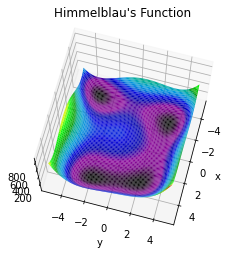

In [1]:
# Demonstration for DMCGA using Himmelblau's function, which has 4 local optimal values = 0.
# Description of Himmelblau's function: https://en.wikipedia.org/wiki/Test_functions_for_optimization
# by Chung-Yi Lin @ Lehigh University (philip928lin@gmail.com) 
# 2021/02/11

from HydroCNHS.DMCGA import DMCGA
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

# Define loss function
def HimmelblauFunc(var, Formatter = None, SubWDInfo = None):
    # -5 <= x,y <= 5
    x = var[0]
    y = var[1]
    return (x**2+y-11)**2 + (x+y**2-7)**2

r"""
# Four optimal solutions
HimmelblauFunc([3,2])                   = 0
HimmelblauFunc([-2.805118,3.131312])    = 0
HimmelblauFunc([-3.779310,-3.283186])   = 0
HimmelblauFunc([3.584428,-1.848126])    = 0
"""
# Plot HimmelblauFunc
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = HimmelblauFunc([X, Y])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='nipy_spectral', edgecolor='none')
ax.view_init(70, 15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Himmelblau's Function");


In [2]:
# Initialize DMCGA
Inputs = {"ParName":["x", "y"], 
          "ParBound":[[-5, 5], [-5, 5]],  # [upper, low] or [4, 6, 9] Even for category type, it has to be numbers!
          "ParType":["real","real"],   # real or category
          "ParWeight":[1, 1],  
          "WD":r"C:\Users\Philip\OneDrive\Lehigh\0_Proj2_UA-SA-Equifinality\ModelRunTest"}   
          
Config = {"NumSP":4,
          "PopSize": 40,            # Must be even.
          "MaxGen": 100,
          "SamplingMethod": "MC",
          "Tolerance":0.5,
          "NumEllite": 1,           # Ellite number for each SP. At least 1.
          "MutProb": 0.3,           # Mutation probability.
          "DropRecord": True,       # Population record will be dropped. However, ALL simulated results will remain. 
          "ParalCores": 1,          # This will overwrite system config.
          "AutoSave": True,         # Automatically save a model snapshot after each generation.
          "Printlevel": 10,         # Print out level. e.g. Every ten generations.
          "Plot": True              # Plot loss with Printlevel frequency.
          }
GA = DMCGA(LossFunc = HimmelblauFunc, Inputs = Inputs, Config = Config)


[02/12 01:01:09] HydroCNHS.DMC [WARNING] !!! Current calibration folder exists. Default to overwrite the folder!!!
C:\Users\Philip\OneDrive\Lehigh\0_Proj2_UA-SA-Equifinality\ModelRunTest\Calibration


[02/12 01:01:12] HydroCNHS.DMC [INFO]    0/ 100   |----------|.
[02/12 01:01:12] HydroCNHS.DMC [INFO]   10/ 100   |#---------|.
[02/12 01:01:12] HydroCNHS.DMC [INFO]   20/ 100   |##--------|.
[02/12 01:01:12] HydroCNHS.DMC [INFO]   30/ 100   |###-------|.
[02/12 01:01:12] HydroCNHS.DMC [INFO]   40/ 100   |####------|.
[02/12 01:01:13] HydroCNHS.DMC [INFO]   50/ 100   |#####-----|.
[02/12 01:01:13] HydroCNHS.DMC [INFO]   60/ 100   |######----|.
[02/12 01:01:13] HydroCNHS.DMC [INFO]   70/ 100   |#######---|.
[02/12 01:01:14] HydroCNHS.DMC [INFO]   80/ 100   |########--|.
[02/12 01:01:14] HydroCNHS.DMC [INFO]   90/ 100   |#########-|.
[02/12 01:01:14] HydroCNHS.DMC [INFO]  100/ 100   |##########|.
[02/12 01:01:14] HydroCNHS.DMC [INFO] Done! [00:00:02]
{'SP0': array([2.9999651 , 2.00002165]),
 'SP1': array([3.00017744, 1.99954612]),
 'SP2': array([3.00023881, 2.00001705]),
 'SP3': array([3.00008054, 1.99980403]),
 'SP4': array([3.00004658, 1.99996703])}


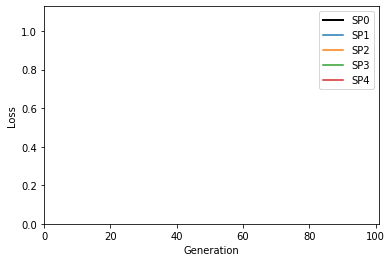

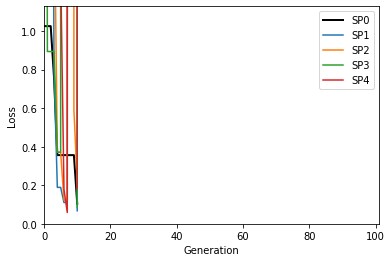

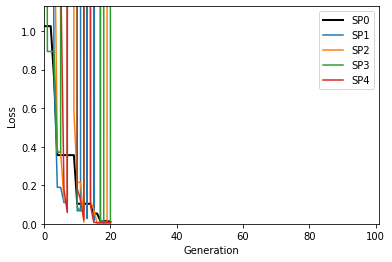

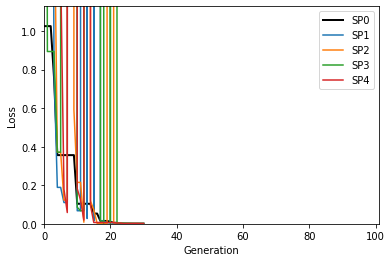

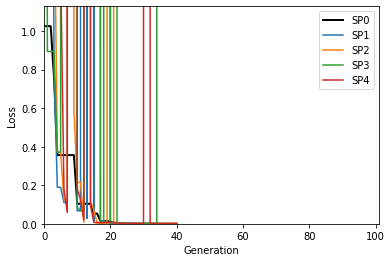

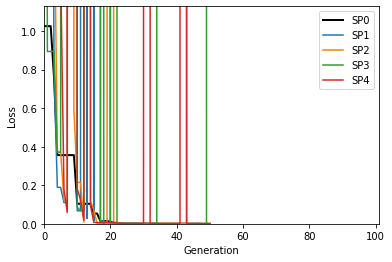

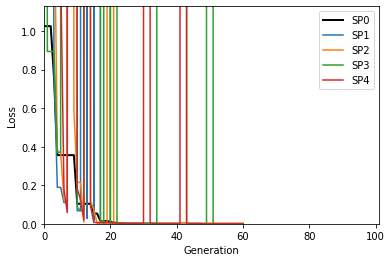

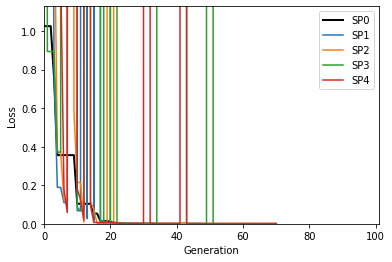

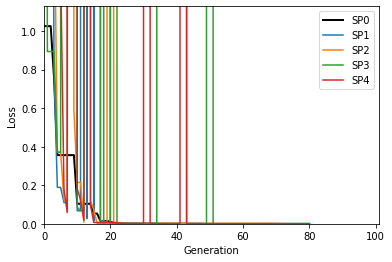

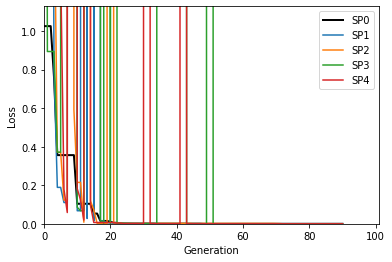

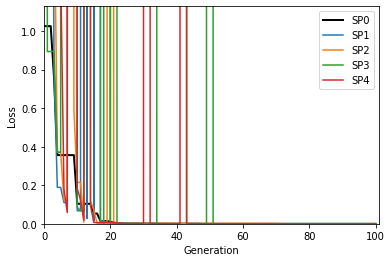

In [3]:
# Start DMCGA
GA.run()
pprint(GA.Solutions)
#GA.Best["Loss"]["SP0"]